In [1]:
import sys
import warnings

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import config
import utility.df
import utility.iolib
import utility.plotlib

#env = sys.argv[1] if len(sys.argv) > 2 else "dev"

In [2]:
# Setup configuration
cfg = config.ResearchConfig
time_format = cfg.CSV_TIME_FORMAT
date_format = cfg.CSV_DATE_FORMAT
cutoff_date = pd.to_datetime(cfg.CUTOFF_DATE, format=cfg.CSV_DATE_FORMAT)

# Retrieve data
df_subspt, _, _, _ = utility.iolib.retrieve_data(cfg)
print("Complete loading data for subscription and lesson history!")

Complete loading data for subscription and lesson history!


In [3]:
start_date = pd.to_datetime('2016-02-01')
end_date = pd.to_datetime('2016-04-01')
dates = pd.date_range(start=start_date, end=end_date, freq='D')
subspt_type = 'Monthly'
p_term = 24
p_unit = 'M'

survival_counts = np.zeros([len(dates), p_term])

i = 0
for date in dates:
    survival = utility.df.subspt_survival(df_subspt, subspt_type, date, p_term, p_unit)
    survival_counts[i,:] = np.array(survival.survival_count)
    i = i + 1

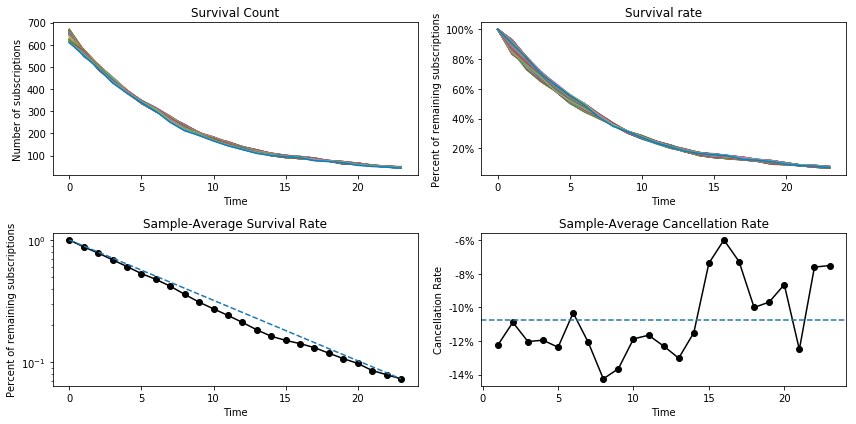

In [4]:
utility.plotlib.survival(survival_counts, cfg)

In [5]:
cutoff_date = pd.to_datetime(cfg.CUTOFF_DATE)
first_date_impFromData = df_subspt.subscription_start_date.min()

rm_annual = True
configuration = cfg

pupils_toBeRemoved = utility.df.filter_subspt_data(df_subspt, first_date_impFromData, cutoff_date, rm_annual)
df_subspt1 = df_subspt[~df_subspt.pupilId.isin(pupils_toBeRemoved)]
df_subspt1 = utility.df.compute_customer_month(df_subspt1, cfg)

By the cutoff date 2018-04-20, there are 1234 active subscriptions.
These subscribers shall be removed from the analysis because we have no evidence to know the lifetime of their subscriptions. 

In the first month of dataset starting from 2014-01-01, there are 154 renewal or new subscriptions.
These subscribers shall be removed from the analysis because we have no evidence to show if they renewed or newly joined. 

We also choose to remove 2525 annual subscribers. 

In summary, there are 3013/5685 subscribers being removed from the dataset in the analysis. 

Calculate customer month in the subscription table.


100%|██████████| 2672/2672 [00:03<00:00, 850.52it/s] 


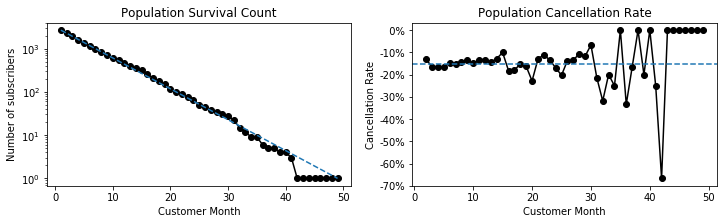

In [6]:
# Population
utility.plotlib.survival_customer_month(df_subspt1, cfg)

In [28]:
# Bootstrap samples
num_samples = 400
sample_length_pct = 0.5
sample_length = round(sample_length_pct*survival_population.shape[0])

samplable_start_dates = pd.date_range(start=first_date_impFromData, \
                                      end=cutoff_date-pd.to_timedelta(sample_length+1, unit='M'), freq='D')


In [29]:
sample_idx = np.random.choice(samplable_start_dates.shape[0], num_samples, replace=False)

In [30]:
df_survival_sample = pd.DataFrame()
for idx in sample_idx:
    start_date = samplable_start_dates[idx]
    end_date = start_date + pd.to_timedelta(sample_length+1, unit='M')
    df_subspt_i = filter_subspt_data(df_subspt, start_date, end_date, rm_annual)
    df_subspt_i = compute_customer_month(df_subspt_i)
    df_survival_sample[idx] = df_subspt_i.groupby('customer_month')['pupilId'].count()
    

Calculate customer month in the subscription table.


100%|██████████| 800/800 [00:00<00:00, 935.09it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1219/1219 [00:01<00:00, 950.29it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1220/1220 [00:01<00:00, 790.42it/s]


Calculate customer month in the subscription table.


100%|██████████| 756/756 [00:01<00:00, 745.62it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1025/1025 [00:01<00:00, 805.67it/s]


Calculate customer month in the subscription table.


100%|██████████| 1214/1214 [00:01<00:00, 955.64it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1213/1213 [00:01<00:00, 968.63it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:01<00:00, 945.26it/s] 


Calculate customer month in the subscription table.


100%|██████████| 861/861 [00:00<00:00, 980.57it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1231/1231 [00:01<00:00, 967.13it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1223/1223 [00:01<00:00, 980.28it/s] 


Calculate customer month in the subscription table.


100%|██████████| 949/949 [00:00<00:00, 985.61it/s] 


Calculate customer month in the subscription table.


100%|██████████| 864/864 [00:01<00:00, 749.18it/s] 


Calculate customer month in the subscription table.


100%|██████████| 862/862 [00:01<00:00, 789.86it/s] 


Calculate customer month in the subscription table.


100%|██████████| 850/850 [00:01<00:00, 764.41it/s]


Calculate customer month in the subscription table.


100%|██████████| 810/810 [00:00<00:00, 975.05it/s] 


Calculate customer month in the subscription table.


100%|██████████| 909/909 [00:00<00:00, 974.03it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:01<00:00, 979.84it/s] 


Calculate customer month in the subscription table.


100%|██████████| 849/849 [00:00<00:00, 973.60it/s] 


Calculate customer month in the subscription table.


100%|██████████| 873/873 [00:00<00:00, 985.41it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1161/1161 [00:01<00:00, 986.16it/s] 


Calculate customer month in the subscription table.


100%|██████████| 822/822 [00:00<00:00, 976.57it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1133/1133 [00:01<00:00, 972.93it/s] 


Calculate customer month in the subscription table.


100%|██████████| 934/934 [00:01<00:00, 761.85it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1002/1002 [00:01<00:00, 745.97it/s]


Calculate customer month in the subscription table.


100%|██████████| 1195/1195 [00:01<00:00, 887.09it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1228/1228 [00:01<00:00, 973.22it/s] 


Calculate customer month in the subscription table.


100%|██████████| 758/758 [00:00<00:00, 974.35it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1105/1105 [00:01<00:00, 977.25it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1137/1137 [00:01<00:00, 986.76it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1221/1221 [00:01<00:00, 964.60it/s] 


Calculate customer month in the subscription table.


100%|██████████| 968/968 [00:00<00:00, 985.79it/s] 


Calculate customer month in the subscription table.


100%|██████████| 889/889 [00:00<00:00, 993.15it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1235/1235 [00:01<00:00, 851.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 855/855 [00:00<00:00, 878.86it/s] 


Calculate customer month in the subscription table.


100%|██████████| 863/863 [00:01<00:00, 675.53it/s]


Calculate customer month in the subscription table.


100%|██████████| 954/954 [00:00<00:00, 990.10it/s] 


Calculate customer month in the subscription table.


100%|██████████| 786/786 [00:00<00:00, 986.98it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1202/1202 [00:01<00:00, 991.90it/s] 


Calculate customer month in the subscription table.


100%|██████████| 856/856 [00:00<00:00, 982.87it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1219/1219 [00:01<00:00, 987.68it/s] 


Calculate customer month in the subscription table.


100%|██████████| 936/936 [00:00<00:00, 965.28it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1204/1204 [00:01<00:00, 977.86it/s] 


Calculate customer month in the subscription table.


100%|██████████| 824/824 [00:00<00:00, 985.65it/s] 


Calculate customer month in the subscription table.


100%|██████████| 834/834 [00:01<00:00, 706.59it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1025/1025 [00:01<00:00, 805.99it/s]


Calculate customer month in the subscription table.


100%|██████████| 1203/1203 [00:01<00:00, 774.33it/s] 


Calculate customer month in the subscription table.


100%|██████████| 834/834 [00:00<00:00, 984.41it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1205/1205 [00:01<00:00, 989.40it/s] 


Calculate customer month in the subscription table.


100%|██████████| 845/845 [00:00<00:00, 967.19it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1195/1195 [00:01<00:00, 1001.52it/s]


Calculate customer month in the subscription table.


100%|██████████| 875/875 [00:00<00:00, 983.81it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1203/1203 [00:01<00:00, 988.29it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1032/1032 [00:01<00:00, 993.98it/s]


Calculate customer month in the subscription table.


100%|██████████| 1207/1207 [00:01<00:00, 834.01it/s] 


Calculate customer month in the subscription table.


100%|██████████| 931/931 [00:01<00:00, 883.67it/s] 


Calculate customer month in the subscription table.


100%|██████████| 859/859 [00:01<00:00, 688.97it/s]


Calculate customer month in the subscription table.


100%|██████████| 1207/1207 [00:01<00:00, 993.24it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1202/1202 [00:01<00:00, 994.16it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1094/1094 [00:01<00:00, 988.48it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1203/1203 [00:01<00:00, 982.83it/s] 


Calculate customer month in the subscription table.


100%|██████████| 846/846 [00:00<00:00, 976.86it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1146/1146 [00:01<00:00, 980.01it/s] 


Calculate customer month in the subscription table.


100%|██████████| 839/839 [00:00<00:00, 971.03it/s] 


Calculate customer month in the subscription table.


100%|██████████| 930/930 [00:00<00:00, 999.62it/s] 


Calculate customer month in the subscription table.


100%|██████████| 807/807 [00:01<00:00, 774.62it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1091/1091 [00:01<00:00, 641.95it/s]


Calculate customer month in the subscription table.


100%|██████████| 1228/1228 [00:01<00:00, 876.42it/s] 


Calculate customer month in the subscription table.


100%|██████████| 966/966 [00:01<00:00, 963.89it/s] 


Calculate customer month in the subscription table.


100%|██████████| 932/932 [00:00<00:00, 998.70it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1026/1026 [00:01<00:00, 992.19it/s]


Calculate customer month in the subscription table.


100%|██████████| 1199/1199 [00:01<00:00, 990.87it/s] 


Calculate customer month in the subscription table.


100%|██████████| 969/969 [00:00<00:00, 980.97it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1194/1194 [00:01<00:00, 994.04it/s] 


Calculate customer month in the subscription table.


100%|██████████| 814/814 [00:00<00:00, 1001.23it/s]


Calculate customer month in the subscription table.


100%|██████████| 1230/1230 [00:01<00:00, 817.50it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1212/1212 [00:01<00:00, 699.16it/s]


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:01<00:00, 988.59it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1224/1224 [00:01<00:00, 988.07it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1014/1014 [00:01<00:00, 984.76it/s]


Calculate customer month in the subscription table.


100%|██████████| 1216/1216 [00:01<00:00, 1004.32it/s]


Calculate customer month in the subscription table.


100%|██████████| 788/788 [00:00<00:00, 986.43it/s] 


Calculate customer month in the subscription table.


100%|██████████| 777/777 [00:00<00:00, 985.37it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1225/1225 [00:01<00:00, 966.28it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1218/1218 [00:01<00:00, 996.42it/s] 


Calculate customer month in the subscription table.


100%|██████████| 854/854 [00:01<00:00, 788.05it/s] 


Calculate customer month in the subscription table.


100%|██████████| 788/788 [00:00<00:00, 899.98it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1203/1203 [00:01<00:00, 658.56it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1151/1151 [00:01<00:00, 972.57it/s] 


Calculate customer month in the subscription table.


100%|██████████| 846/846 [00:00<00:00, 994.04it/s] 


Calculate customer month in the subscription table.


100%|██████████| 861/861 [00:00<00:00, 974.67it/s] 


Calculate customer month in the subscription table.


100%|██████████| 815/815 [00:00<00:00, 997.36it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1216/1216 [00:01<00:00, 981.10it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1229/1229 [00:01<00:00, 969.08it/s] 


Calculate customer month in the subscription table.


100%|██████████| 858/858 [00:00<00:00, 983.33it/s] 


Calculate customer month in the subscription table.


100%|██████████| 782/782 [00:00<00:00, 975.29it/s] 


Calculate customer month in the subscription table.


100%|██████████| 802/802 [00:00<00:00, 1048.39it/s]


Calculate customer month in the subscription table.


100%|██████████| 870/870 [00:01<00:00, 700.56it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1056/1056 [00:01<00:00, 871.50it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1212/1212 [00:01<00:00, 1001.50it/s]


Calculate customer month in the subscription table.


100%|██████████| 864/864 [00:00<00:00, 981.76it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1086/1086 [00:01<00:00, 997.08it/s]


Calculate customer month in the subscription table.


100%|██████████| 801/801 [00:00<00:00, 980.10it/s] 


Calculate customer month in the subscription table.


100%|██████████| 861/861 [00:00<00:00, 987.11it/s] 


Calculate customer month in the subscription table.


100%|██████████| 754/754 [00:00<00:00, 980.17it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1200/1200 [00:01<00:00, 961.95it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1234/1234 [00:01<00:00, 876.79it/s] 


Calculate customer month in the subscription table.


100%|██████████| 836/836 [00:00<00:00, 882.77it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1225/1225 [00:02<00:00, 601.34it/s]


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:01<00:00, 938.78it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1204/1204 [00:01<00:00, 955.79it/s] 


Calculate customer month in the subscription table.


100%|██████████| 864/864 [00:00<00:00, 982.46it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1205/1205 [00:01<00:00, 969.19it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1126/1126 [00:01<00:00, 996.27it/s] 


Calculate customer month in the subscription table.


100%|██████████| 874/874 [00:00<00:00, 985.79it/s] 


Calculate customer month in the subscription table.


100%|██████████| 868/868 [00:00<00:00, 986.23it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1168/1168 [00:01<00:00, 999.14it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1197/1197 [00:01<00:00, 896.61it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1175/1175 [00:01<00:00, 730.87it/s] 


Calculate customer month in the subscription table.


100%|██████████| 808/808 [00:00<00:00, 901.29it/s] 


Calculate customer month in the subscription table.


100%|██████████| 886/886 [00:00<00:00, 986.81it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1146/1146 [00:01<00:00, 997.24it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1231/1231 [00:01<00:00, 910.99it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1208/1208 [00:01<00:00, 950.35it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1230/1230 [00:01<00:00, 984.42it/s] 


Calculate customer month in the subscription table.


100%|██████████| 834/834 [00:00<00:00, 994.54it/s] 


Calculate customer month in the subscription table.


100%|██████████| 893/893 [00:00<00:00, 967.53it/s] 


Calculate customer month in the subscription table.


100%|██████████| 888/888 [00:01<00:00, 804.69it/s] 


Calculate customer month in the subscription table.


100%|██████████| 886/886 [00:01<00:00, 600.95it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:01<00:00, 1000.48it/s]


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 996.38it/s] 


Calculate customer month in the subscription table.


100%|██████████| 822/822 [00:00<00:00, 996.99it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 992.52it/s] 


Calculate customer month in the subscription table.


100%|██████████| 955/955 [00:00<00:00, 976.72it/s] 


Calculate customer month in the subscription table.


100%|██████████| 988/988 [00:00<00:00, 999.92it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1208/1208 [00:01<00:00, 994.13it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1220/1220 [00:01<00:00, 979.15it/s] 


Calculate customer month in the subscription table.


100%|██████████| 823/823 [00:01<00:00, 724.52it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 650.53it/s]


Calculate customer month in the subscription table.


100%|██████████| 1153/1153 [00:01<00:00, 980.10it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1144/1144 [00:01<00:00, 981.39it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 1004.22it/s]


Calculate customer month in the subscription table.


100%|██████████| 786/786 [00:00<00:00, 990.37it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1216/1216 [00:01<00:00, 979.43it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1040/1040 [00:01<00:00, 988.63it/s]


Calculate customer month in the subscription table.


100%|██████████| 932/932 [00:00<00:00, 991.08it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1204/1204 [00:01<00:00, 984.52it/s] 


Calculate customer month in the subscription table.


100%|██████████| 776/776 [00:00<00:00, 781.49it/s] 


Calculate customer month in the subscription table.


100%|██████████| 867/867 [00:00<00:00, 927.32it/s] 


Calculate customer month in the subscription table.


100%|██████████| 901/901 [00:01<00:00, 682.19it/s]


Calculate customer month in the subscription table.


100%|██████████| 1162/1162 [00:01<00:00, 989.40it/s] 


Calculate customer month in the subscription table.


100%|██████████| 826/826 [00:00<00:00, 977.85it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1125/1125 [00:01<00:00, 982.03it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1189/1189 [00:01<00:00, 996.94it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1220/1220 [00:01<00:00, 979.38it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1234/1234 [00:01<00:00, 993.04it/s] 


Calculate customer month in the subscription table.


100%|██████████| 934/934 [00:01<00:00, 931.20it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 657.81it/s] 


Calculate customer month in the subscription table.


100%|██████████| 859/859 [00:01<00:00, 673.25it/s] 


Calculate customer month in the subscription table.


100%|██████████| 955/955 [00:01<00:00, 736.89it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1150/1150 [00:01<00:00, 955.46it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1155/1155 [00:01<00:00, 961.72it/s] 


Calculate customer month in the subscription table.


100%|██████████| 807/807 [00:00<00:00, 988.54it/s] 


Calculate customer month in the subscription table.


100%|██████████| 952/952 [00:00<00:00, 995.20it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:01<00:00, 994.50it/s] 


Calculate customer month in the subscription table.


100%|██████████| 886/886 [00:00<00:00, 980.34it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1127/1127 [00:01<00:00, 993.23it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1084/1084 [00:01<00:00, 801.46it/s]


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 739.62it/s] 


Calculate customer month in the subscription table.


100%|██████████| 868/868 [00:00<00:00, 975.49it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1222/1222 [00:01<00:00, 991.56it/s] 


Calculate customer month in the subscription table.


100%|██████████| 880/880 [00:00<00:00, 996.01it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 1000.45it/s]


Calculate customer month in the subscription table.


100%|██████████| 1172/1172 [00:01<00:00, 987.64it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1195/1195 [00:01<00:00, 1003.22it/s]


Calculate customer month in the subscription table.


100%|██████████| 827/827 [00:00<00:00, 972.11it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1221/1221 [00:01<00:00, 982.54it/s] 


Calculate customer month in the subscription table.


100%|██████████| 792/792 [00:00<00:00, 907.82it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1171/1171 [00:01<00:00, 920.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1200/1200 [00:01<00:00, 668.04it/s]


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:00<00:00, 1329.87it/s]


Calculate customer month in the subscription table.


100%|██████████| 1224/1224 [00:01<00:00, 991.53it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1211/1211 [00:01<00:00, 980.93it/s] 


Calculate customer month in the subscription table.


100%|██████████| 934/934 [00:00<00:00, 993.69it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1190/1190 [00:01<00:00, 990.95it/s] 


Calculate customer month in the subscription table.


100%|██████████| 976/976 [00:00<00:00, 984.60it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1126/1126 [00:01<00:00, 991.45it/s] 


Calculate customer month in the subscription table.


100%|██████████| 785/785 [00:00<00:00, 883.65it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1202/1202 [00:01<00:00, 890.24it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1143/1143 [00:01<00:00, 765.82it/s] 


Calculate customer month in the subscription table.


100%|██████████| 757/757 [00:00<00:00, 994.87it/s] 


Calculate customer month in the subscription table.


100%|██████████| 837/837 [00:00<00:00, 986.62it/s] 


Calculate customer month in the subscription table.


100%|██████████| 840/840 [00:00<00:00, 983.19it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1079/1079 [00:01<00:00, 978.14it/s] 


Calculate customer month in the subscription table.


100%|██████████| 933/933 [00:00<00:00, 989.44it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1208/1208 [00:01<00:00, 996.19it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1148/1148 [00:01<00:00, 982.25it/s] 


Calculate customer month in the subscription table.


100%|██████████| 936/936 [00:00<00:00, 982.64it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1223/1223 [00:01<00:00, 742.84it/s]


Calculate customer month in the subscription table.


100%|██████████| 1208/1208 [00:01<00:00, 614.39it/s]


Calculate customer month in the subscription table.


100%|██████████| 970/970 [00:00<00:00, 976.82it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1217/1217 [00:01<00:00, 981.16it/s] 


Calculate customer month in the subscription table.


100%|██████████| 965/965 [00:00<00:00, 1340.21it/s]


Calculate customer month in the subscription table.


100%|██████████| 1231/1231 [00:01<00:00, 993.12it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1183/1183 [00:01<00:00, 973.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 932/932 [00:00<00:00, 1328.74it/s]


Calculate customer month in the subscription table.


100%|██████████| 935/935 [00:00<00:00, 997.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1134/1134 [00:01<00:00, 983.83it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1143/1143 [00:01<00:00, 787.21it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:02<00:00, 607.89it/s]


Calculate customer month in the subscription table.


100%|██████████| 1044/1044 [00:01<00:00, 979.50it/s]


Calculate customer month in the subscription table.


100%|██████████| 831/831 [00:00<00:00, 991.30it/s] 


Calculate customer month in the subscription table.


100%|██████████| 973/973 [00:01<00:00, 971.16it/s] 


Calculate customer month in the subscription table.


100%|██████████| 840/840 [00:00<00:00, 973.49it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1124/1124 [00:01<00:00, 962.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 797/797 [00:00<00:00, 986.28it/s] 


Calculate customer month in the subscription table.


100%|██████████| 860/860 [00:00<00:00, 997.08it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1143/1143 [00:01<00:00, 985.00it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1224/1224 [00:01<00:00, 850.97it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1146/1146 [00:01<00:00, 767.09it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1201/1201 [00:01<00:00, 921.01it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:01<00:00, 981.79it/s] 


Calculate customer month in the subscription table.


100%|██████████| 861/861 [00:00<00:00, 988.36it/s] 


Calculate customer month in the subscription table.


100%|██████████| 873/873 [00:00<00:00, 978.44it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1085/1085 [00:01<00:00, 982.34it/s] 


Calculate customer month in the subscription table.


100%|██████████| 935/935 [00:00<00:00, 987.14it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1170/1170 [00:01<00:00, 1002.38it/s]


Calculate customer month in the subscription table.


100%|██████████| 858/858 [00:00<00:00, 980.80it/s] 


Calculate customer month in the subscription table.


100%|██████████| 875/875 [00:00<00:00, 978.23it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1201/1201 [00:01<00:00, 819.54it/s] 


Calculate customer month in the subscription table.


100%|██████████| 933/933 [00:01<00:00, 575.09it/s]


Calculate customer month in the subscription table.


100%|██████████| 917/917 [00:00<00:00, 982.03it/s] 


Calculate customer month in the subscription table.


100%|██████████| 872/872 [00:00<00:00, 983.33it/s] 


Calculate customer month in the subscription table.


100%|██████████| 861/861 [00:00<00:00, 980.41it/s] 


Calculate customer month in the subscription table.


100%|██████████| 956/956 [00:00<00:00, 992.11it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1206/1206 [00:01<00:00, 994.75it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1225/1225 [00:01<00:00, 973.59it/s] 


Calculate customer month in the subscription table.


100%|██████████| 827/827 [00:00<00:00, 977.00it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1231/1231 [00:01<00:00, 987.40it/s] 


Calculate customer month in the subscription table.


100%|██████████| 836/836 [00:00<00:00, 839.26it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1175/1175 [00:01<00:00, 860.02it/s] 


Calculate customer month in the subscription table.


100%|██████████| 888/888 [00:01<00:00, 774.39it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1201/1201 [00:01<00:00, 984.08it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1233/1233 [00:01<00:00, 996.80it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1218/1218 [00:01<00:00, 985.57it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1207/1207 [00:01<00:00, 989.65it/s] 


Calculate customer month in the subscription table.


100%|██████████| 934/934 [00:00<00:00, 990.21it/s] 


Calculate customer month in the subscription table.


100%|██████████| 756/756 [00:00<00:00, 981.94it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1201/1201 [00:01<00:00, 984.29it/s] 


Calculate customer month in the subscription table.


100%|██████████| 845/845 [00:00<00:00, 973.70it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:01<00:00, 886.91it/s] 


Calculate customer month in the subscription table.


100%|██████████| 880/880 [00:01<00:00, 627.87it/s]


Calculate customer month in the subscription table.


100%|██████████| 1238/1238 [00:01<00:00, 982.01it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1180/1180 [00:01<00:00, 994.13it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1210/1210 [00:01<00:00, 978.46it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1099/1099 [00:01<00:00, 984.76it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1229/1229 [00:01<00:00, 979.00it/s] 


Calculate customer month in the subscription table.


100%|██████████| 853/853 [00:00<00:00, 988.95it/s] 


Calculate customer month in the subscription table.


100%|██████████| 781/781 [00:00<00:00, 984.11it/s] 


Calculate customer month in the subscription table.


100%|██████████| 833/833 [00:00<00:00, 960.26it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1212/1212 [00:01<00:00, 792.49it/s] 


Calculate customer month in the subscription table.


100%|██████████| 862/862 [00:01<00:00, 557.60it/s] 


Calculate customer month in the subscription table.


100%|██████████| 790/790 [00:00<00:00, 983.37it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1149/1149 [00:01<00:00, 979.17it/s] 


Calculate customer month in the subscription table.


100%|██████████| 811/811 [00:00<00:00, 970.73it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1224/1224 [00:01<00:00, 1004.61it/s]


Calculate customer month in the subscription table.


100%|██████████| 858/858 [00:00<00:00, 987.59it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:01<00:00, 979.43it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1200/1200 [00:01<00:00, 972.76it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1174/1174 [00:01<00:00, 1004.40it/s]


Calculate customer month in the subscription table.


100%|██████████| 1196/1196 [00:01<00:00, 793.70it/s]


Calculate customer month in the subscription table.


100%|██████████| 1196/1196 [00:01<00:00, 623.95it/s]


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:01<00:00, 988.86it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1092/1092 [00:01<00:00, 975.60it/s] 


Calculate customer month in the subscription table.


100%|██████████| 792/792 [00:00<00:00, 975.96it/s] 


Calculate customer month in the subscription table.


100%|██████████| 876/876 [00:01<00:00, 860.46it/s] 


Calculate customer month in the subscription table.


100%|██████████| 998/998 [00:01<00:00, 967.40it/s] 


Calculate customer month in the subscription table.


100%|██████████| 935/935 [00:00<00:00, 993.55it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1210/1210 [00:01<00:00, 986.74it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1140/1140 [00:01<00:00, 981.89it/s] 


Calculate customer month in the subscription table.


100%|██████████| 954/954 [00:01<00:00, 757.76it/s] 


Calculate customer month in the subscription table.


100%|██████████| 825/825 [00:00<00:00, 847.89it/s] 


Calculate customer month in the subscription table.


100%|██████████| 889/889 [00:01<00:00, 740.18it/s] 


Calculate customer month in the subscription table.


100%|██████████| 994/994 [00:01<00:00, 968.09it/s] 


Calculate customer month in the subscription table.


100%|██████████| 952/952 [00:00<00:00, 1325.77it/s]


Calculate customer month in the subscription table.


100%|██████████| 957/957 [00:00<00:00, 972.19it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1200/1200 [00:01<00:00, 983.75it/s] 


Calculate customer month in the subscription table.


100%|██████████| 824/824 [00:00<00:00, 960.26it/s] 


Calculate customer month in the subscription table.


100%|██████████| 773/773 [00:00<00:00, 989.87it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:01<00:00, 989.21it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1145/1145 [00:01<00:00, 976.51it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1223/1223 [00:01<00:00, 806.39it/s] 


Calculate customer month in the subscription table.


100%|██████████| 934/934 [00:01<00:00, 551.04it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1130/1130 [00:01<00:00, 969.29it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1192/1192 [00:01<00:00, 983.43it/s] 


Calculate customer month in the subscription table.


100%|██████████| 791/791 [00:00<00:00, 995.68it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1228/1228 [00:01<00:00, 974.75it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1148/1148 [00:01<00:00, 980.52it/s] 


Calculate customer month in the subscription table.


100%|██████████| 942/942 [00:00<00:00, 988.59it/s] 


Calculate customer month in the subscription table.


100%|██████████| 894/894 [00:00<00:00, 966.67it/s] 


Calculate customer month in the subscription table.


100%|██████████| 808/808 [00:00<00:00, 990.39it/s] 


Calculate customer month in the subscription table.


100%|██████████| 835/835 [00:00<00:00, 904.11it/s] 


Calculate customer month in the subscription table.


100%|██████████| 880/880 [00:00<00:00, 949.05it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1152/1152 [00:01<00:00, 654.25it/s]


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:00<00:00, 1344.71it/s]


Calculate customer month in the subscription table.


100%|██████████| 1226/1226 [00:01<00:00, 969.30it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1206/1206 [00:01<00:00, 983.72it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1181/1181 [00:01<00:00, 992.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1201/1201 [00:01<00:00, 980.58it/s] 


Calculate customer month in the subscription table.


100%|██████████| 814/814 [00:00<00:00, 987.17it/s] 


Calculate customer month in the subscription table.


100%|██████████| 954/954 [00:00<00:00, 969.69it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1227/1227 [00:01<00:00, 876.21it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1083/1083 [00:01<00:00, 849.80it/s]


Calculate customer month in the subscription table.


100%|██████████| 889/889 [00:01<00:00, 739.59it/s]


Calculate customer month in the subscription table.


100%|██████████| 820/820 [00:00<00:00, 973.28it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1057/1057 [00:01<00:00, 989.40it/s]


Calculate customer month in the subscription table.


100%|██████████| 1232/1232 [00:01<00:00, 948.07it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1146/1146 [00:01<00:00, 985.20it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1086/1086 [00:01<00:00, 972.48it/s] 


Calculate customer month in the subscription table.


100%|██████████| 861/861 [00:00<00:00, 973.32it/s] 


Calculate customer month in the subscription table.


100%|██████████| 816/816 [00:00<00:00, 984.06it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1148/1148 [00:01<00:00, 984.54it/s] 


Calculate customer month in the subscription table.


100%|██████████| 989/989 [00:01<00:00, 776.29it/s]


Calculate customer month in the subscription table.


100%|██████████| 936/936 [00:01<00:00, 572.84it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1141/1141 [00:01<00:00, 979.53it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1139/1139 [00:01<00:00, 981.33it/s] 


Calculate customer month in the subscription table.


100%|██████████| 798/798 [00:00<00:00, 975.93it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1032/1032 [00:01<00:00, 994.01it/s]


Calculate customer month in the subscription table.


100%|██████████| 764/764 [00:00<00:00, 975.89it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1230/1230 [00:01<00:00, 964.27it/s] 


Calculate customer month in the subscription table.


100%|██████████| 844/844 [00:00<00:00, 991.23it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1154/1154 [00:01<00:00, 978.08it/s] 


Calculate customer month in the subscription table.


100%|██████████| 997/997 [00:01<00:00, 889.24it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1176/1176 [00:01<00:00, 864.24it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1183/1183 [00:01<00:00, 771.10it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1151/1151 [00:01<00:00, 990.16it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1118/1118 [00:01<00:00, 996.81it/s] 


Calculate customer month in the subscription table.


100%|██████████| 827/827 [00:00<00:00, 964.33it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1215/1215 [00:01<00:00, 979.64it/s] 


Calculate customer month in the subscription table.


100%|██████████| 923/923 [00:00<00:00, 995.67it/s] 


Calculate customer month in the subscription table.


100%|██████████| 951/951 [00:00<00:00, 983.45it/s] 


Calculate customer month in the subscription table.


100%|██████████| 965/965 [00:00<00:00, 981.51it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1202/1202 [00:00<00:00, 1328.16it/s]


Calculate customer month in the subscription table.


100%|██████████| 1209/1209 [00:01<00:00, 892.20it/s] 


Calculate customer month in the subscription table.


100%|██████████| 869/869 [00:01<00:00, 633.51it/s]


Calculate customer month in the subscription table.


100%|██████████| 765/765 [00:00<00:00, 946.94it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1219/1219 [00:01<00:00, 967.91it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1146/1146 [00:01<00:00, 996.14it/s] 


Calculate customer month in the subscription table.


100%|██████████| 929/929 [00:00<00:00, 977.91it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1083/1083 [00:01<00:00, 986.11it/s]


Calculate customer month in the subscription table.


100%|██████████| 1144/1144 [00:01<00:00, 990.46it/s] 


Calculate customer month in the subscription table.


100%|██████████| 933/933 [00:00<00:00, 1331.91it/s]


Calculate customer month in the subscription table.


100%|██████████| 815/815 [00:00<00:00, 987.57it/s] 


Calculate customer month in the subscription table.


100%|██████████| 933/933 [00:01<00:00, 709.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 784/784 [00:00<00:00, 848.27it/s] 


Calculate customer month in the subscription table.


100%|██████████| 945/945 [00:01<00:00, 682.07it/s]


Calculate customer month in the subscription table.


100%|██████████| 941/941 [00:00<00:00, 976.24it/s] 


Calculate customer month in the subscription table.


100%|██████████| 932/932 [00:00<00:00, 982.48it/s] 


Calculate customer month in the subscription table.


100%|██████████| 933/933 [00:00<00:00, 986.35it/s] 


Calculate customer month in the subscription table.


100%|██████████| 848/848 [00:00<00:00, 971.45it/s] 


Calculate customer month in the subscription table.


100%|██████████| 965/965 [00:00<00:00, 965.16it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1086/1086 [00:01<00:00, 993.16it/s]


Calculate customer month in the subscription table.


100%|██████████| 892/892 [00:01<00:00, 730.38it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1225/1225 [00:01<00:00, 918.12it/s] 


Calculate customer month in the subscription table.


100%|██████████| 798/798 [00:01<00:00, 771.59it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1142/1142 [00:02<00:00, 567.32it/s]


Calculate customer month in the subscription table.


100%|██████████| 1104/1104 [00:01<00:00, 792.45it/s]


Calculate customer month in the subscription table.


100%|██████████| 1174/1174 [00:01<00:00, 972.74it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1201/1201 [00:01<00:00, 971.20it/s] 


Calculate customer month in the subscription table.


100%|██████████| 876/876 [00:00<00:00, 983.98it/s] 


Calculate customer month in the subscription table.


100%|██████████| 858/858 [00:00<00:00, 968.16it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1228/1228 [00:01<00:00, 973.91it/s] 


Calculate customer month in the subscription table.


100%|██████████| 873/873 [00:01<00:00, 861.31it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1087/1087 [00:01<00:00, 982.11it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1212/1212 [00:01<00:00, 867.35it/s] 


Calculate customer month in the subscription table.


100%|██████████| 789/789 [00:01<00:00, 566.15it/s]


Calculate customer month in the subscription table.


100%|██████████| 824/824 [00:00<00:00, 980.56it/s] 


Calculate customer month in the subscription table.


100%|██████████| 938/938 [00:00<00:00, 992.77it/s] 


Calculate customer month in the subscription table.


100%|██████████| 857/857 [00:00<00:00, 969.75it/s] 


Calculate customer month in the subscription table.


100%|██████████| 805/805 [00:00<00:00, 990.90it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1147/1147 [00:01<00:00, 980.43it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1194/1194 [00:01<00:00, 993.39it/s] 


Calculate customer month in the subscription table.


100%|██████████| 985/985 [00:01<00:00, 983.34it/s] 


Calculate customer month in the subscription table.


100%|██████████| 864/864 [00:00<00:00, 972.15it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1146/1146 [00:01<00:00, 921.79it/s] 


Calculate customer month in the subscription table.


100%|██████████| 934/934 [00:00<00:00, 952.95it/s] 


Calculate customer month in the subscription table.


100%|██████████| 862/862 [00:01<00:00, 597.44it/s]


Calculate customer month in the subscription table.


100%|██████████| 934/934 [00:00<00:00, 978.57it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1196/1196 [00:01<00:00, 986.18it/s] 


Calculate customer month in the subscription table.


100%|██████████| 952/952 [00:00<00:00, 972.86it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1148/1148 [00:01<00:00, 992.65it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1205/1205 [00:01<00:00, 995.37it/s] 


Calculate customer month in the subscription table.


100%|██████████| 932/932 [00:00<00:00, 987.26it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1149/1149 [00:01<00:00, 984.03it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1127/1127 [00:01<00:00, 985.76it/s] 


Calculate customer month in the subscription table.


100%|██████████| 947/947 [00:01<00:00, 811.43it/s] 


Calculate customer month in the subscription table.


100%|██████████| 938/938 [00:01<00:00, 586.69it/s] 


Calculate customer month in the subscription table.


100%|██████████| 790/790 [00:00<00:00, 996.87it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1184/1184 [00:01<00:00, 986.11it/s] 


Calculate customer month in the subscription table.


100%|██████████| 1216/1216 [00:01<00:00, 970.31it/s] 


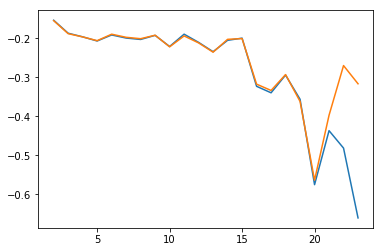

In [40]:
plt.plot(df_survival_sample.sum(axis=1).pct_change())
plt.plot(df_survival_sample.pct_change().mean(axis=1))